# WetGrass analyzed with PyMC2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm2
import scipy.stats as stats
import pprint as pp

np.random.seed(1234)
# plt.style.use('ggplot')

# plots don't show on notebook unless use this
%matplotlib inline

In [2]:
import os
import sys
cur_dir_path = os.getcwd()
print(cur_dir_path)
os.chdir('../../')
qfog_path = os.getcwd()
print(qfog_path)
sys.path.insert(0,qfog_path)

/home/jupyter/Notebooks/Quantum/quantum-fog/jupyter-notebooks/inference_via_ext_software
/home/jupyter/Notebooks/Quantum/quantum-fog


In [3]:
# enter observations here
did_obs_Cloudy = True
data_Cloudy = [0]

did_obs_Rain = False
data_Rain = None

did_obs_Sprinkler = False
data_Sprinkler = None

did_obs_WetGrass = False
data_WetGrass = None

In [4]:
# build unfilled model from bif
import importlib
mm = importlib.import_module("jupyter-notebooks.inference_via_ext_software.ModelMaker")
from graphs.BayesNet import *
in_path = "examples_cbnets/WetGrass.bif"
bnet = BayesNet.read_bif(in_path, False)
file_prefix = "examples_cbnets/WetGrass_unfilled"
mm.ModelMaker.write_pymc2_model(file_prefix, bnet,
                             vtx_to_data=None, unfilled=True)

In [5]:
# -i option allows it to access notebook's namespace
%run -i examples_cbnets/WetGrass_unfilled_pymc2.py

In [6]:
nd_names_lex_ord

['Cloudy', 'Rain', 'Sprinkler', 'WetGrass']

In [7]:
for vtx in nd_names_lex_ord:
    var = eval(vtx)
    print(vtx)
    print('parents:' , var.parents)
    print('children: ', var.children)
    print('\n')

Cloudy
parents: {'p': array([ 0.5,  0.5])}
children:  {<pymc.PyMCObjects.Deterministic 'p_Rain' at 0x7f3ab05254a8>, <pymc.PyMCObjects.Deterministic 'p_Sprinkler' at 0x7f3ab05254e0>}


Rain
parents: {'p': <pymc.PyMCObjects.Deterministic 'p_Rain' at 0x7f3ab05254a8>}
children:  {<pymc.PyMCObjects.Deterministic 'p_WetGrass' at 0x7f3a8e498f60>}


Sprinkler
parents: {'p': <pymc.PyMCObjects.Deterministic 'p_Sprinkler' at 0x7f3ab05254e0>}
children:  {<pymc.PyMCObjects.Deterministic 'p_WetGrass' at 0x7f3a8e498f60>}


WetGrass
parents: {'p': <pymc.PyMCObjects.Deterministic 'p_WetGrass' at 0x7f3a8e498f60>}
children:  set()




In [8]:
mod = pm2.Model([eval(vtx) for vtx in nd_names_lex_ord])

In [9]:
# map estimates of variables, could be used as starting values for sampler
mapper = pm2.MAP(mod)
mapper.fit()
for x in mod.variables:
    print(x, "=",  x.value)

Cloudy = [0]
Sprinkler = 1
WetGrass = 1
Rain = 1


In [10]:
# sample the model
sampler = pm2.MCMC(mod)
sampler.sample(iter=1100, burn=100)

 [-----------------100%-----------------] 1100 of 1100 complete in 0.3 sec

Plotting WetGrass
Plotting Sprinkler
Plotting Rain


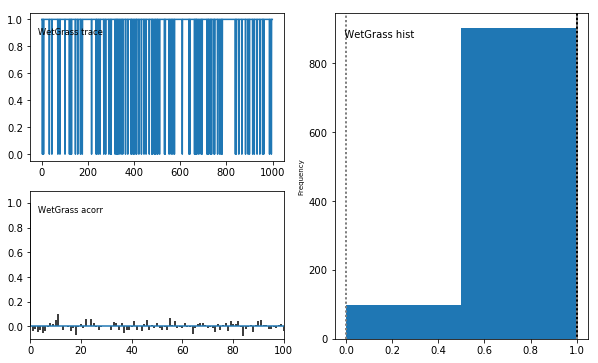

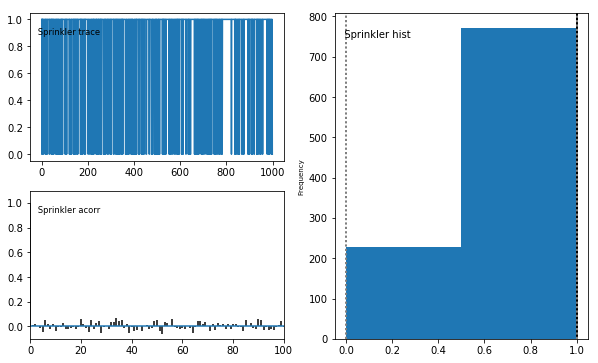

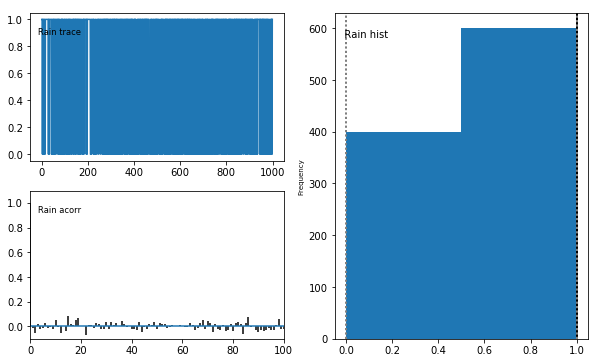

In [11]:
# analysis of samples
pm2.Matplot.plot(sampler, path="pypm2_plots");

In [12]:
for x in mod.variables:
    if not x.observed:
        x.summary()


Sprinkler:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.771            0.42             0.014                  [ 0.  1.]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.0              1.0             1.0            1.0           1.0
	

WetGrass:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.902            0.297            0.008                  [ 0.  1.]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.0              1.0             1.0            1.0           1.0
	

Rain:
 
	Mean             SD               MC Error        95% HPD interval
	-------------------

/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


When call plot() from pymc2 (but not pymc3), the program creates folder called pymc2_plots. Next step deletes it

In [13]:
%%bash
rm -rf pymc2_plots